<h1> Task 2 - Predict customer buying behaviour </h1>

# Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline

In [3]:
data= 'customer_booking.csv'

In [4]:
import chardet
with open('customer_booking.csv', 'rb') as rawdata:result = chardet.detect(rawdata.read(100000))
print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [5]:
df= pd.read_csv(data, encoding='ISO-8859-1')

In [6]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


# Exploratory Data Analysis

In [7]:
df.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [8]:
df.shape

(50000, 14)

In [9]:
#Checking null values
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [10]:
df.booking_complete.value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

# Mutual Information

In [11]:
X= df.drop('booking_complete',axis=1)
y= df.booking_complete

In [12]:
#changing object dtype to int dtype
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

In [13]:
X.dtypes

num_passengers             int64
sales_channel              int64
trip_type                  int64
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
route                      int64
booking_origin             int64
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
dtype: object

In [14]:
from sklearn.feature_selection import mutual_info_classif
mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores # show a few features with their MI scores

route                    0.054923
booking_origin           0.046250
flight_duration          0.016607
wants_extra_baggage      0.009949
length_of_stay           0.007896
wants_in_flight_meals    0.005533
wants_preferred_seat     0.004010
purchase_lead            0.002470
sales_channel            0.001881
num_passengers           0.001531
flight_hour              0.000979
flight_day               0.000016
trip_type                0.000000
Name: MI Scores, dtype: float64

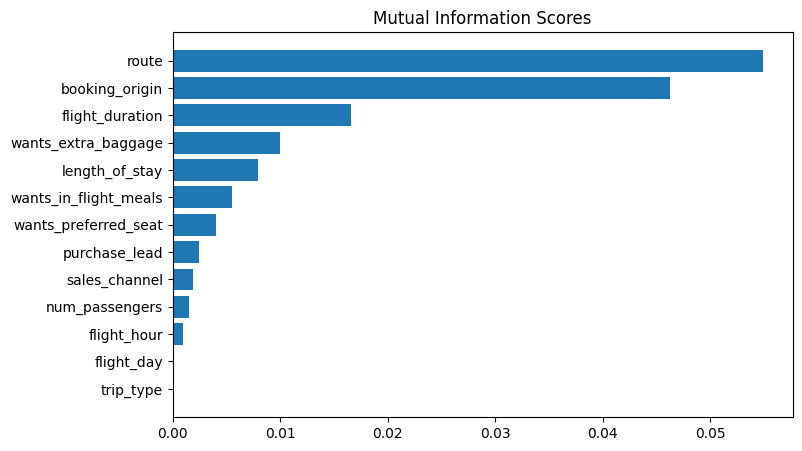

In [15]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [17]:
#Spliting test and train data
from sklearn.model_selection import train_test_split
def dataset(X,y):
    train_full_X, val_X, train_full_y, val_y = train_test_split(X, y,test_size=0.2,random_state = 0)
#Use the same function above for the validation set
    train_X, test_X, train_y, test_y = train_test_split(train_full_X, train_full_y, test_size=0.25,random_state = 0)
    return (train_X, val_X, train_y, val_y)

In [18]:
from sklearn.preprocessing import MinMaxScaler
def scale(X):
    scaler = MinMaxScaler()
    scaler.fit(X)
    return X

# Testing Different Models

## Random Forest

### Random forest classifier with top 6 features

In [19]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
features=['route','booking_origin','flight_duration','wants_extra_baggage', 'length_of_stay','num_passengers']
X= df[features]
X = pd.get_dummies(X, columns=features)
X= scale(X)
y= df.booking_complete
X_train,X_val,y_train,y_val= dataset(X,y)
forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(X_train, y_train)
preds= forest_model.predict(X_val)

In [20]:
print('ACCURACY: ',accuracy_score(y_val,preds)*100)
print('AUC score: ',roc_auc_score(y_val,preds))

ACCURACY:  83.36
AUC score:  0.5657818407546988


### Random forest classifier with all features

In [21]:
X= df.drop('booking_complete',axis=1)
X = pd.get_dummies(X)
X= scale(X)
y= df.booking_complete
X_train,X_val,y_train,y_val= dataset(X,y)
forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(X_train, y_train)
preds= forest_model.predict(X_val)

In [22]:
print('ACCURACY: ',accuracy_score(y_val,preds)*100)
print('AUC score: ',roc_auc_score(y_val,preds))

ACCURACY:  84.76
AUC score:  0.5479604084813514


## XG Boost classifier

### XGB classifier with top 6 features

In [23]:
from xgboost import XGBClassifier
X= df[features]
X = pd.get_dummies(X, columns=features)
X= scale(X)
y= df.booking_complete
X_train,X_val,y_train,y_val= dataset(X,y)
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
prediction_xgb = xgb_model.predict(X_val)

In [24]:
print('ACCURACY: ',accuracy_score(y_val, prediction_xgb)*100)
print('AUC score: ',roc_auc_score(y_val,prediction_xgb))

ACCURACY:  84.72
AUC score:  0.5189398567740671


### XGB classifier with all features

In [25]:
X= df.drop('booking_complete',axis=1)
X = pd.get_dummies(X)
X= scale(X)
y= df.booking_complete
X_train,X_val,y_train,y_val= dataset(X,y)
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
prediction_xgb = xgb_model.predict(X_val)

In [26]:
print('ACCURACY: ',accuracy_score(y_val, prediction_xgb)*100)
print('AUC score: ',roc_auc_score(y_val,prediction_xgb))

ACCURACY:  84.98
AUC score:  0.5424676175552812


Finalizing random forest model with all features as final model, as it has goos accuracy and higher auc score compared to other models


# Validating with test data set

In [27]:
X= df.drop('booking_complete',axis=1)
#one hot encoding
X = pd.get_dummies(X)
X= scale(X)
y= df.booking_complete
train_full_X,test_X, train_full_y, test_y = train_test_split(X, y,test_size=0.2,random_state = 0)
forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(train_full_X, train_full_y)
preds= forest_model.predict(test_X)

In [28]:
print('ACCURACY: ',accuracy_score(test_y,preds)*100)
print('AUC score: ',roc_auc_score(test_y,preds))

ACCURACY:  85.09
AUC score:  0.5577796717361984
